In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import tensorboard as tb

import tensorflow as tf
from tensorflow.python.summary.summary_iterator import summary_iterator
from matplotlib import pyplot as plt
from scipy import stats
import tbparser

In [186]:
def get_losses(tensorboard_file, train_tags, test_tags, valid_tags):
    ## validation results 
    valid_results = []
    reader = SummaryReader(tensorboard_file, tag_filter=valid_tags)
    for item in reader: 
        datapoint = [item[0], item[1], item[3], "valid"]
        if item[0] == "val/valid-loss":
            print("HI")
        valid_results.append(datapoint)
    valid_df = pd.DataFrame(valid_results, columns=['tag', 'epoch', 'value', 'stage'])
    
    ## train results 
    train_results = []
    reader = SummaryReader(tensorboard_file, tag_filter=train_tags)
    for item in reader: 
        datapoint = [item[0], item[1], item[3], "train"]
        train_results.append(datapoint)
    train_df = pd.DataFrame(train_results, columns=['tag', 'epoch', 'value', 'stage'])
    
    ## test results 
    test_results = []
    reader = SummaryReader(tensorboard_file, tag_filter=test_tags)
    for item in reader: 
        datapoint = [item[0], item[1], item[3], "test"]
        test_results.append(datapoint)
    test_df = pd.DataFrame(test_results, columns=['tag', 'epoch', 'value', 'stage'])
    
    return valid_df, train_df, test_df

# reading in / writing results to df's

In [169]:
from tbparser.summary_reader import SummaryReader

In [170]:
train_taus = [0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 0.8, 0.9]

In [171]:
train_tags = ['train/train-loss']
for i in range(10): 
    class_tags = [] 
    for tau in train_taus: 
        loss_name = "train/class-" + str(i) + "-loss-{}".format(tau)
        class_tags.append(loss_name)
    train_tags.extend(class_tags)

In [172]:
test_tags = ['test/test-loss']
for i in range(10): 
    class_tags = [] 
    for tau in train_taus: 
        loss_name = "test/class-" + str(i) + "-loss-{}".format(tau)
        class_tags.append(loss_name)
    test_tags.extend(class_tags)

In [173]:
valid_tags = ['val/val-loss']
for i in range(10): 
    class_tags = [] 
    for tau in train_taus: 
        loss_name = "val/class-" + str(i) + "-loss-{}".format(tau)
        class_tags.append(loss_name)
    valid_tags.extend(class_tags)

In [174]:
train_tags[:5]

['train/train-loss',
 'train/class-0-loss-0.1',
 'train/class-0-loss-0.2',
 'train/class-0-loss-0.3',
 'train/class-0-loss-0.4']

In [175]:
test_tags[:5]

['test/test-loss',
 'test/class-0-loss-0.1',
 'test/class-0-loss-0.2',
 'test/class-0-loss-0.3',
 'test/class-0-loss-0.4']

In [176]:
valid_tags[:5]

['val/val-loss',
 'val/class-0-loss-0.1',
 'val/class-0-loss-0.2',
 'val/class-0-loss-0.3',
 'val/class-0-loss-0.4']

In [177]:
runs = ['debug-traintau-approx-f1-imb-0.125-0', 'debug-traintau-approx-f1-imb-0.5-0', 'debug-traintau-approx-f1-imb-0.8-0']

In [209]:
path = "/Users/taesoodaniellee/Documents/heaviside/multiclass_src/tensorboard/cifar-10/"
file_path = "/".join([path, "debug-traintau-approx-f1-imb-0.125-0"])

valid_df, train_df, test_df = get_losses(tensorboard_file=file_path, train_tags=train_tags, test_tags=test_tags, 
                                         valid_tags=valid_tags)

In [210]:
valid_df = valid_df.drop_duplicates(subset=['tag', 'epoch'], keep='last')
test_df = test_df.drop_duplicates(subset=['tag', 'epoch'], keep='last')
train_df = train_df.drop_duplicates(subset=['tag', 'epoch'], keep='last')

In [211]:
valid_df = valid_df.sort_values(by=['tag', 'epoch'])
# test_df = test_df.sort_values(by=['tag', 'epoch'])
train_df = train_df.sort_values(by=['tag', 'epoch'])

In [212]:
def add_class_col(row): 
    return row['tag'].split("/")[1].split("-")[1]
def add_etau_col(row):
    if (row['tag'] != "train/train-loss"): 
        return row['tag'].split("/")[1].split("-")[3]

In [213]:
valid_df['class'] = valid_df.apply(add_class_col, axis=1)
test_df['class'] = test_df.apply(add_class_col, axis=1)
train_df['class'] = train_df.apply(add_class_col, axis=1)

In [214]:
train_df.head()

,tag,epoch,value,stage,class
26750,train/class-0-loss-0.1,0,0.156616,train,0
26861,train/class-0-loss-0.1,1,0.317596,train,0
26972,train/class-0-loss-0.1,2,0.345098,train,0
27083,train/class-0-loss-0.1,3,0.382114,train,0
27194,train/class-0-loss-0.1,4,0.361233,train,0


In [215]:
valid_df['eval-tau'] = valid_df.apply(add_etau_col, axis=1)
# test_df['eval-tau'] = test_df.apply(add_etau_col, axis=1)
train_df['eval-tau'] = train_df.apply(add_etau_col, axis=1)

In [206]:
## need to plot, per class, and per train tau (all eval tau curves)
## per class 
## per train tau -> dataframe is already for train tau 0.125 

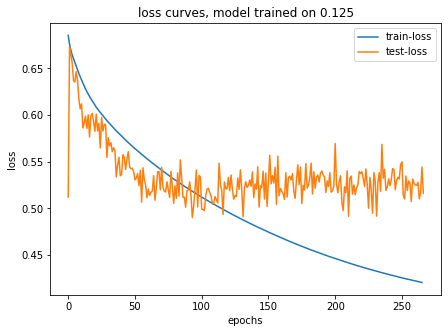

In [282]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)
xs = train_df['epoch'].unique()[0:266]

plt.plot(xs, train_df[train_df['tag'] == "train/train-loss"]['value'], label="train-loss")
plt.plot(test_df['epoch'].unique(), test_df[test_df['tag'] == "test/test-loss"]['value'], label="test-loss")

plt.title("loss curves, model trained on 0.125")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [225]:
train_df.head()

,tag,epoch,value,stage,class,eval-tau
26750,train/class-0-loss-0.1,0,0.156616,train,0,0.1
26861,train/class-0-loss-0.1,1,0.317596,train,0,0.1
26972,train/class-0-loss-0.1,2,0.345098,train,0,0.1
27083,train/class-0-loss-0.1,3,0.382114,train,0,0.1
27194,train/class-0-loss-0.1,4,0.361233,train,0,0.1


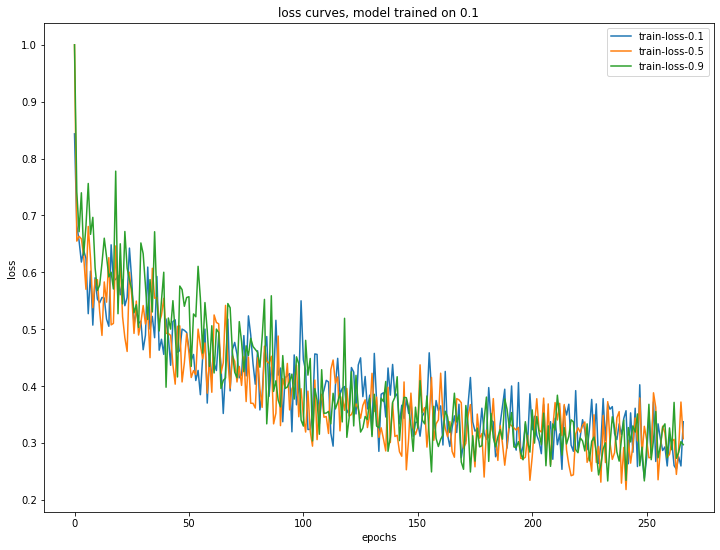

In [235]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,9)
xs = train_df['epoch'].unique()

eval_taus = [0.1, 0.5, 0.9]
for tau in eval_taus: 
    sub_df = train_df[(train_df['class']==str(0)) & (train_df['eval-tau'] == str(tau))]
    plt.plot(xs, 1-sub_df['value'], label="train-loss-{}".format(tau))

plt.title("loss curves, model trained on 0.1")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

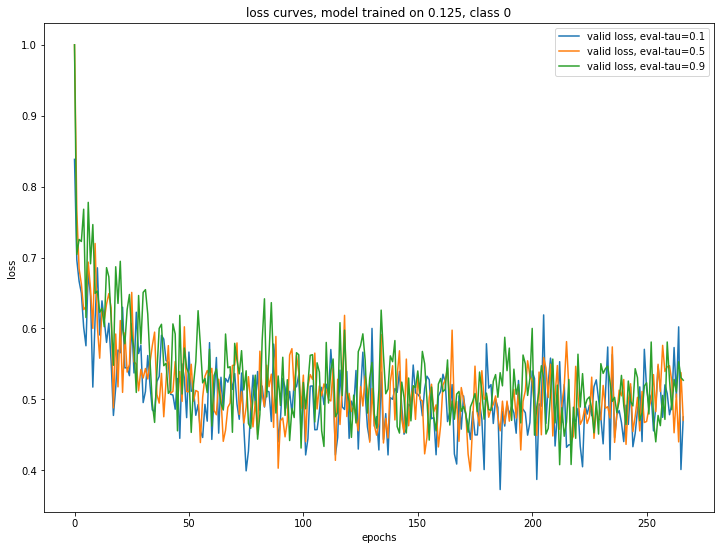

In [239]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,9)
xs = valid_df['epoch'].unique()

class_val = 0 
# eval_taus = [0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 0.8, 0.9]
eval_taus = [0.1, 0.5, 0.9]
for tau in eval_taus: 
    sub_df = valid_df[(valid_df['class'] == str(class_val)) & (valid_df['eval-tau'] == str(tau))]
    plt.plot(xs, 1-sub_df['value'], label="valid loss, eval-tau={}".format(tau))

plt.title("loss curves, model trained on 0.125, class {}".format(class_val))
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

In [258]:
import warnings
warnings.filterwarnings('ignore')

In [309]:
# finding undertrained classes and eval taus
eval_taus = [0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 0.8, 0.9]
for i in range(10): 
    for tau in eval_taus: 
        sub_df = valid_df[(valid_df['class'] == str(i)) & (valid_df['eval-tau'] == str(tau))]
        sub_df['loss'] = 1 - sub_df['value']
        sub_df = sub_df[sub_df.epoch != 0]
        min_loss_epoch = sub_df[sub_df.loss == sub_df.loss.min()]['epoch'].item()
        total_epochs = len(sub_df.epoch.unique())
        if total_epochs - min_loss_epoch < 50: 
            print("For Class {}, Eval Tau: {}, Min Loss: {:.3f}, Min Loss Epoch: {}, Epochs: {}".format(
                i, tau, sub_df.loss.min(), min_loss_epoch,total_epochs))

For Class 0, Eval Tau: 0.3, Min Loss: 0.377, Min Loss Epoch: 236, Epochs: 266
For Class 0, Eval Tau: 0.55, Min Loss: 0.366, Min Loss Epoch: 217, Epochs: 266
For Class 1, Eval Tau: 0.3, Min Loss: 0.292, Min Loss Epoch: 256, Epochs: 266
For Class 1, Eval Tau: 0.9, Min Loss: 0.312, Min Loss Epoch: 224, Epochs: 266
For Class 2, Eval Tau: 0.3, Min Loss: 0.528, Min Loss Epoch: 239, Epochs: 266
For Class 2, Eval Tau: 0.7, Min Loss: 0.571, Min Loss Epoch: 243, Epochs: 266
For Class 4, Eval Tau: 0.1, Min Loss: 0.544, Min Loss Epoch: 266, Epochs: 266
For Class 4, Eval Tau: 0.2, Min Loss: 0.496, Min Loss Epoch: 244, Epochs: 266
For Class 4, Eval Tau: 0.5, Min Loss: 0.502, Min Loss Epoch: 240, Epochs: 266
For Class 5, Eval Tau: 0.2, Min Loss: 0.520, Min Loss Epoch: 253, Epochs: 266
For Class 6, Eval Tau: 0.8, Min Loss: 0.440, Min Loss Epoch: 230, Epochs: 266
For Class 7, Eval Tau: 0.2, Min Loss: 0.390, Min Loss Epoch: 239, Epochs: 266
For Class 7, Eval Tau: 0.3, Min Loss: 0.421, Min Loss Epoch: 25

In [287]:
valid_df[(valid_df['class'] == str(1))].sort_values(['epoch', 'tag'])

,tag,epoch,value,stage,class,eval-tau
26511,val/class-1-loss-0.1,0,0.000000,valid,1,0.1
26521,val/class-1-loss-0.2,0,0.000000,valid,1,0.2
26531,val/class-1-loss-0.3,0,0.000000,valid,1,0.3
26541,val/class-1-loss-0.4,0,0.000000,valid,1,0.4
26551,val/class-1-loss-0.45,0,0.000000,valid,1,0.45
...,...,...,...,...,...,...
55831,val/class-1-loss-0.55,266,0.562500,valid,1,0.55
55841,val/class-1-loss-0.6,266,0.597701,valid,1,0.6
55851,val/class-1-loss-0.7,266,0.536082,valid,1,0.7
55861,val/class-1-loss-0.8,266,0.603352,valid,1,0.8


In [323]:
# also should go ahead and average across all of the evaluation taus 
# for a single train-tau, for a SINGLE class, average all the eval-tau values together 
test = valid_df[(valid_df['class'] == str(9))].groupby(['epoch']).mean().reset_index()['value'].tolist()
test = [1 - x for x in test]

In [324]:
test = np.array(test)
min_epoch = np.argmin(test)

In [325]:
print(min_epoch)
print(len(test))

179
267


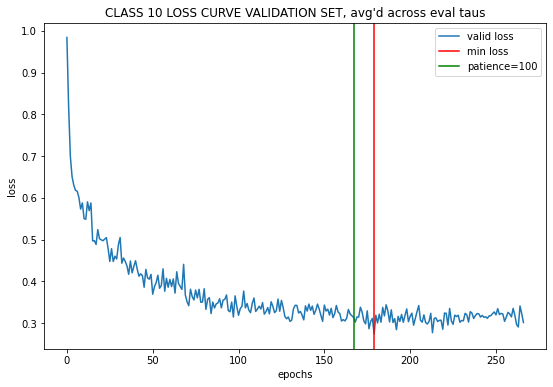

In [327]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (9,6)
xs = range(len(test))

plt.plot(xs, test, label="valid loss")
plt.axvline(x=min_epoch, color='r', label="min loss")
plt.axvline(x=len(test)-100, color='g', label="patience=100")
plt.title("CLASS 10 LOSS CURVE VALIDATION SET, avg'd across eval taus")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

In [31]:
valid_df = valid_df.drop(valid_df.tail(1).index)
test_df = test_df.drop(test_df.tail(1).index)

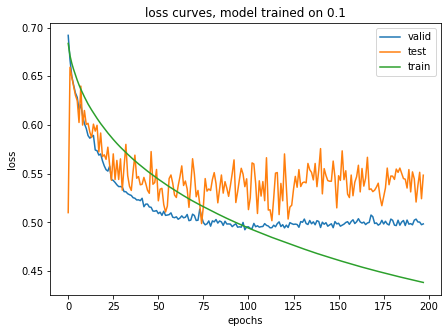

In [33]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)
xs = valid_df['epoch']
plt.plot(xs, valid_df['value'], label="valid")
plt.plot(xs, test_df['value'], label="test")
plt.plot(xs, train_df['value'], label="train")

plt.title("loss curves, model trained on 0.1")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

# looking at 0.125 

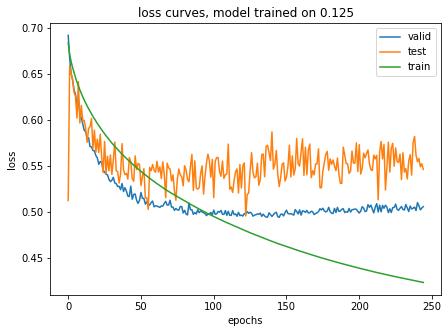

In [38]:
path = "/Users/taesoodaniellee/Documents/heaviside/multiclass_src/tensorboard/cifar-10/20201208-runs/v3-traintau-approx-f1-imb-0.125-2"
train_tags = ['train/train-loss']
test_tags = ['test/test-loss']
valid_tags = ['val/valid-loss']
valid_df, train_df, test_df = get_losses(tensorboard_file=path, train_tags=train_tags, 
                                         test_tags=test_tags, valid_tags=valid_tags)

valid_df = valid_df.drop(valid_df.tail(1).index)
test_df = test_df.drop(test_df.tail(1).index)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)
xs = valid_df['epoch']
plt.plot(xs, valid_df['value'], label="valid")
plt.plot(xs, test_df['value'], label="test")
plt.plot(xs, train_df['value'], label="train")

plt.title("loss curves, model trained on 0.125")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()


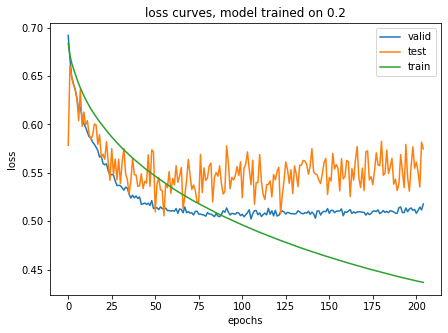

In [39]:
path = "/Users/taesoodaniellee/Documents/heaviside/multiclass_src/tensorboard/cifar-10/20201208-runs/v3-traintau-approx-f1-imb-0.2-2"
train_tags = ['train/train-loss']
test_tags = ['test/test-loss']
valid_tags = ['val/valid-loss']
valid_df, train_df, test_df = get_losses(tensorboard_file=path, train_tags=train_tags, 
                                         test_tags=test_tags, valid_tags=valid_tags)

valid_df = valid_df.drop(valid_df.tail(1).index)
test_df = test_df.drop(test_df.tail(1).index)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)
xs = valid_df['epoch']
plt.plot(xs, valid_df['value'], label="valid")
plt.plot(xs, test_df['value'], label="test")
plt.plot(xs, train_df['value'], label="train")

plt.title("loss curves, model trained on 0.2")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()


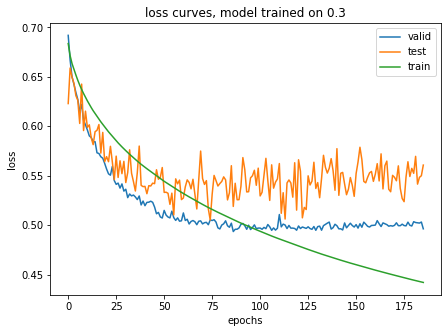

In [40]:
path = "/Users/taesoodaniellee/Documents/heaviside/multiclass_src/tensorboard/cifar-10/20201208-runs/v3-traintau-approx-f1-imb-0.3-2"
train_tags = ['train/train-loss']
test_tags = ['test/test-loss']
valid_tags = ['val/valid-loss']
valid_df, train_df, test_df = get_losses(tensorboard_file=path, train_tags=train_tags, 
                                         test_tags=test_tags, valid_tags=valid_tags)

valid_df = valid_df.drop(valid_df.tail(1).index)
test_df = test_df.drop(test_df.tail(1).index)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)
xs = valid_df['epoch']
plt.plot(xs, valid_df['value'], label="valid")
plt.plot(xs, test_df['value'], label="test")
plt.plot(xs, train_df['value'], label="train")

plt.title("loss curves, model trained on 0.3")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()


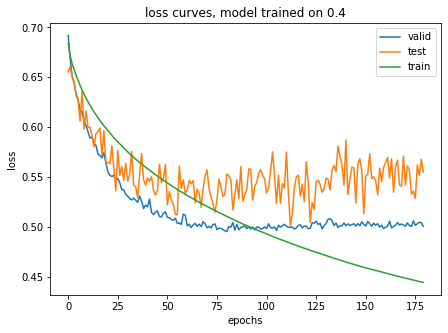

In [41]:
path = "/Users/taesoodaniellee/Documents/heaviside/multiclass_src/tensorboard/cifar-10/20201208-runs/v3-traintau-approx-f1-imb-0.4-2"
train_tags = ['train/train-loss']
test_tags = ['test/test-loss']
valid_tags = ['val/valid-loss']
valid_df, train_df, test_df = get_losses(tensorboard_file=path, train_tags=train_tags, 
                                         test_tags=test_tags, valid_tags=valid_tags)

valid_df = valid_df.drop(valid_df.tail(1).index)
test_df = test_df.drop(test_df.tail(1).index)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)
xs = valid_df['epoch']
plt.plot(xs, valid_df['value'], label="valid")
plt.plot(xs, test_df['value'], label="test")
plt.plot(xs, train_df['value'], label="train")

plt.title("loss curves, model trained on 0.4")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()


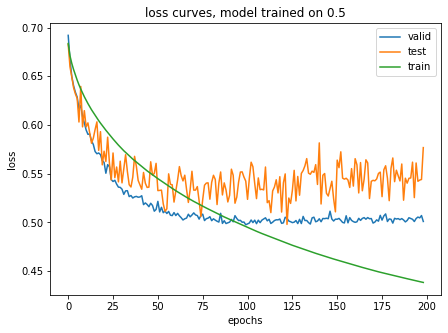

In [42]:
path = "/Users/taesoodaniellee/Documents/heaviside/multiclass_src/tensorboard/cifar-10/20201208-runs/v3-traintau-approx-f1-imb-0.5-2"
train_tags = ['train/train-loss']
test_tags = ['test/test-loss']
valid_tags = ['val/valid-loss']
valid_df, train_df, test_df = get_losses(tensorboard_file=path, train_tags=train_tags, 
                                         test_tags=test_tags, valid_tags=valid_tags)

valid_df = valid_df.drop(valid_df.tail(1).index)
test_df = test_df.drop(test_df.tail(1).index)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)
xs = valid_df['epoch']
plt.plot(xs, valid_df['value'], label="valid")
plt.plot(xs, test_df['value'], label="test")
plt.plot(xs, train_df['value'], label="train")

plt.title("loss curves, model trained on 0.5")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()


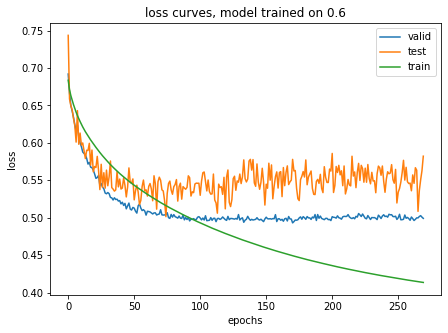

In [43]:
path = "/Users/taesoodaniellee/Documents/heaviside/multiclass_src/tensorboard/cifar-10/20201208-runs/v3-traintau-approx-f1-imb-0.6-2"
train_tags = ['train/train-loss']
test_tags = ['test/test-loss']
valid_tags = ['val/valid-loss']
valid_df, train_df, test_df = get_losses(tensorboard_file=path, train_tags=train_tags, 
                                         test_tags=test_tags, valid_tags=valid_tags)

valid_df = valid_df.drop(valid_df.tail(1).index)
test_df = test_df.drop(test_df.tail(1).index)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)
xs = valid_df['epoch']
plt.plot(xs, valid_df['value'], label="valid")
plt.plot(xs, test_df['value'], label="test")
plt.plot(xs, train_df['value'], label="train")

plt.title("loss curves, model trained on 0.6")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()


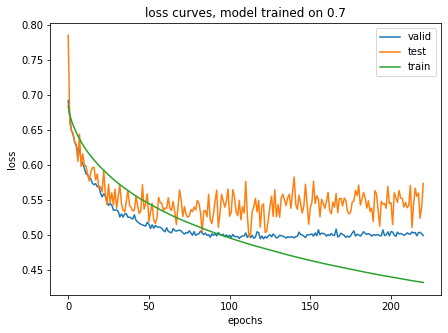

In [44]:
path = "/Users/taesoodaniellee/Documents/heaviside/multiclass_src/tensorboard/cifar-10/20201208-runs/v3-traintau-approx-f1-imb-0.7-2"
train_tags = ['train/train-loss']
test_tags = ['test/test-loss']
valid_tags = ['val/valid-loss']
valid_df, train_df, test_df = get_losses(tensorboard_file=path, train_tags=train_tags, 
                                         test_tags=test_tags, valid_tags=valid_tags)

valid_df = valid_df.drop(valid_df.tail(1).index)
test_df = test_df.drop(test_df.tail(1).index)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)
xs = valid_df['epoch']
plt.plot(xs, valid_df['value'], label="valid")
plt.plot(xs, test_df['value'], label="test")
plt.plot(xs, train_df['value'], label="train")

plt.title("loss curves, model trained on 0.7")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()


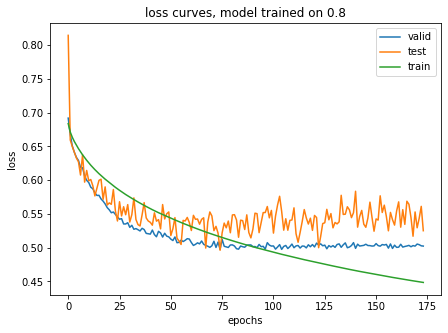

In [45]:
path = "/Users/taesoodaniellee/Documents/heaviside/multiclass_src/tensorboard/cifar-10/20201208-runs/v3-traintau-approx-f1-imb-0.8-2"
train_tags = ['train/train-loss']
test_tags = ['test/test-loss']
valid_tags = ['val/valid-loss']
valid_df, train_df, test_df = get_losses(tensorboard_file=path, train_tags=train_tags, 
                                         test_tags=test_tags, valid_tags=valid_tags)

valid_df = valid_df.drop(valid_df.tail(1).index)
test_df = test_df.drop(test_df.tail(1).index)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)
xs = valid_df['epoch']
plt.plot(xs, valid_df['value'], label="valid")
plt.plot(xs, test_df['value'], label="test")
plt.plot(xs, train_df['value'], label="train")

plt.title("loss curves, model trained on 0.8")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()


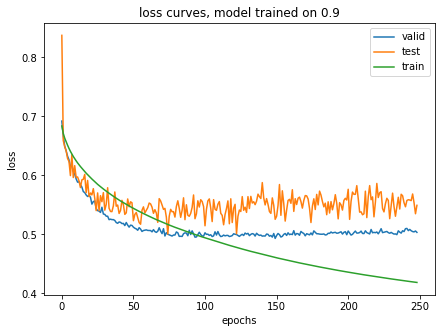

In [46]:
path = "/Users/taesoodaniellee/Documents/heaviside/multiclass_src/tensorboard/cifar-10/20201208-runs/v3-traintau-approx-f1-imb-0.9-2"
train_tags = ['train/train-loss']
test_tags = ['test/test-loss']
valid_tags = ['val/valid-loss']
valid_df, train_df, test_df = get_losses(tensorboard_file=path, train_tags=train_tags, 
                                         test_tags=test_tags, valid_tags=valid_tags)

valid_df = valid_df.drop(valid_df.tail(1).index)
test_df = test_df.drop(test_df.tail(1).index)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)
xs = valid_df['epoch']
plt.plot(xs, valid_df['value'], label="valid")
plt.plot(xs, test_df['value'], label="test")
plt.plot(xs, train_df['value'], label="train")

plt.title("loss curves, model trained on 0.9")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()
